<a href="https://colab.research.google.com/github/airpark69/-I-studied-/blob/main/Multi_kernel_1D_CNN_with_GloVe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 설치하기

TPU 관련 패키지를 설치합니다. TPU 사용시 아래 라인 첫 문자(#)를 지우고 수행하세요. GPU를 쓴다면 아래 라인을 실행할 필요가 없습니다.

In [ ]:
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
def create_model():
   return tf.keras.Sequential(
        [tf.keras.layers.Conv2D(256, 3, activation='relu', input_shape=(28, 28,
            1)),
        tf.keras.layers.Conv2D(256, 3, activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)])

In [ ]:
with strategy.scope():
  model = create_model()
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=
                True),
                metrics=['sparse_categorical_accuracy'])

TPU 이외에 의존성 있는 패키지를 설치합니다.

# 구글 드라이브 연동하기
모델 체크포인트 등을 저장해 둘 구글 드라이브를 연결합니다. 자신의 구글 계정에 적용됩니다.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


# 체크포인트 설정

In [ ]:
pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = df[~df['sku'].isna()]

In [ ]:
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
df = df[['sku', 'category_name_1']].dropna()

In [ ]:
df = df[df['category_name_1'] != '\\N']

In [ ]:
df.head(10)

,sku,category_name_1
0,kreations_YI 06-L,Women's Fashion
1,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,Beauty & Grooming
2,Ego_UP0017-999-MR0,Women's Fashion
3,kcc_krone deal,Beauty & Grooming
4,BK7010400AG,Soghaat
5,UK_Namkino All In One 200 Gms,Soghaat
6,kcc_krone deal,Beauty & Grooming
7,UK_Namkino Mix Nimco 400 Gms,Soghaat
8,Apple iPhone 6S 64GB,Mobiles & Tablets
9,Apple iPhone 6S 64GB,Mobiles & Tablets


In [ ]:
df['category_name_1'].value_counts(normalize=True)

Mobiles & Tablets     0.200709
Men's Fashion         0.159965
Women's Fashion       0.103591
Appliances            0.090915
Superstore            0.075650
Beauty & Grooming     0.071978
Soghaat               0.058995
Others                0.050681
Home & Living         0.045973
Entertainment         0.045659
Health & Sports       0.030359
Kids & Baby           0.028610
Computing             0.027637
School & Education    0.006033
Books                 0.003244
Name: category_name_1, dtype: float64

In [ ]:
df.to_csv('paki_ecommerce_clean.csv', index=False)

In [ ]:
df['category_name_1'].value_counts().index

Index(['Mobiles & Tablets', 'Men's Fashion', 'Women's Fashion', 'Appliances',
       'Superstore', 'Beauty & Grooming', 'Soghaat', 'Others', 'Home & Living',
       'Entertainment', 'Health & Sports', 'Kids & Baby', 'Computing',
       'School & Education', 'Books'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("/gdrive/MyDrive/2023beaver/NLPpractice1/paki_ecommerce_clean.csv")

train_data, test_data = train_test_split(df, train_size=0.80, test_size=0.20, random_state=2)

In [ ]:
df['sku'].max()

'zuni16_319-A'

In [ ]:
df['category_name_1'].value_counts(normalize=True)

Mobiles & Tablets     0.200709
Men's Fashion         0.159965
Women's Fashion       0.103591
Appliances            0.090915
Superstore            0.075650
Beauty & Grooming     0.071978
Soghaat               0.058995
Others                0.050681
Home & Living         0.045973
Entertainment         0.045659
Health & Sports       0.030359
Kids & Baby           0.028610
Computing             0.027637
School & Education    0.006033
Books                 0.003244
Name: category_name_1, dtype: float64

In [ ]:
df_encoded['category_name_1'].value_counts()

4     115710
7      92221
1      59721
5      52413
12     43613
2      41496
3      34011
9      29218
6      26504
10     26323
13     17502
8      16494
11     15933
15      3478
14      1870
Name: category_name_1, dtype: int64

In [ ]:
feature = 'sku'
target = 'category_name_1'

# 토크나이저 선언

# 학습데이터 구축
학습데이터를 만듭니다.

In [ ]:
intent_train = train_data[feature].tolist()
label_train = train_data[target].tolist()
intent_test = test_data[feature].tolist()
label_test = test_data[target].tolist()

In [ ]:
# 레 이 블 인 코 딩 . 레 이 블 에 고 유 한 정 수 를 부 여
idx_encode = preprocessing.LabelEncoder()
idx_encode.fit(label_train)

label_train = idx_encode.transform(label_train) # 주 어 진 고 유 한 정 수 로 변 환
label_test = idx_encode.transform(label_test) # 고 유 한 정 수 로 변 환

label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(
idx_encode.classes_))))
print(' 레 이 블 과 정 수 의 맵 핑 관 계 :',label_idx)

 레 이 블 과 정 수 의 맵 핑 관 계 : {'Appliances': 0, 'Beauty & Grooming': 1, 'Books': 2, 'Computing': 3, 'Entertainment': 4, 'Health & Sports': 5, 'Home & Living': 6, 'Kids & Baby': 7, "Men's Fashion": 8, 'Mobiles & Tablets': 9, 'Others': 10, 'School & Education': 11, 'Soghaat': 12, 'Superstore': 13, "Women's Fashion": 14}


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(intent_train)
sequences = tokenizer.texts_to_sequences(intent_train)
sequences[:5] # 상 위 5 개 샘 플 출 력

[[521, 3094, 43, 334],
 [66, 302, 140, 271, 798, 1938],
 [137, 138, 199, 3],
 [1026],
 [35290]]

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print(' 단 어 집 합 (Vocabulary) 의 크 기 :',vocab_size)

 단 어 집 합 (Vocabulary) 의 크 기 : 60862


 문 장 의 최 대 길 이 : 15
 문 장 의 평 균 길 이 : 2.6299953382985874


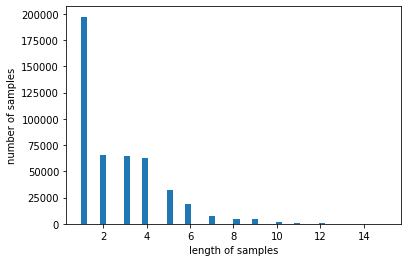

In [ ]:
print(' 문 장 의 최 대 길 이 :',max(len(l) for l in sequences))
print(' 문 장 의 평 균 길 이 :',sum(map(len, sequences))/len(sequences))
plt.hist([len(s) for s in sequences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len = 15

intent_train = pad_sequences(sequences, maxlen = max_len)
label_train = to_categorical(np.asarray(label_train))
print(' 훈 련 데 이 터 의 크 기 (shape):', intent_train.shape)
print(' 훈 련 데 이 터 레 이 블 의 크 기 (shape):', label_train.shape)

 훈 련 데 이 터 의 크 기 (shape): (461205, 15)
 훈 련 데 이 터 레 이 블 의 크 기 (shape): (461205, 15)


In [ ]:
indices = np.arange(intent_train.shape[0])
np.random.shuffle(indices)
print(' 랜 덤 시 퀀 스 :',indices)

 랜 덤 시 퀀 스 : [455862  30327  58068 ...  51520 326898 192713]


In [ ]:
intent_train = intent_train[indices]
label_train = label_train[indices]

In [ ]:
n_of_val = int(0.1 * intent_train.shape[0])
print(' 검 증 데 이 터 의 개 수 :',n_of_val)

 검 증 데 이 터 의 개 수 : 46120


In [ ]:
X_train = intent_train[:-n_of_val]
y_train = label_train[:-n_of_val]
X_val = intent_train[-n_of_val:]
y_val = label_train[-n_of_val:]
X_test = intent_test
y_test = label_test
print(' 훈 련 데 이 터 의 크 기 (shape):', X_train.shape)
print(' 검 증 데 이 터 의 크 기 (shape):', X_val.shape)
print(' 훈 련 데 이 터 레 이 블 의 크 기 (shape):', y_train.shape)
print(' 검 증 데 이 터 레 이 블 의 크 기 (shape):', y_val.shape)
print(' 테 스 트 데 이 터 의 개 수 :', len(X_test))
print(' 테 스 트 데 이 터 레 이 블 의 개 수 :', len(y_test))

 훈 련 데 이 터 의 크 기 (shape): (415085, 15)
 검 증 데 이 터 의 크 기 (shape): (46120, 15)
 훈 련 데 이 터 레 이 블 의 크 기 (shape): (415085, 15)
 검 증 데 이 터 레 이 블 의 크 기 (shape): (46120, 15)
 테 스 트 데 이 터 의 개 수 : 115302
 테 스 트 데 이 터 레 이 블 의 개 수 : 115302


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2022-12-19 13:35:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-12-19 13:35:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-19 13:35:12--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
embedding_dict = dict()
f = open(os.path.join('glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100 개 의 값을 가 지 는 array 로 변 환
    embedding_dict[word] = word_vector_arr
    
f.close()

print('%s 개 의 Embedding vector 가 있 습 니 다 .' % len(embedding_dict))

400000 개 의 Embedding vector 가 있 습 니 다 .


In [ ]:
print(embedding_dict['respectable'])
print(len(embedding_dict['respectable']))

[-0.049773   0.19903    0.10585    0.1391    -0.32395    0.44053
  0.3947    -0.22805   -0.25793    0.49768    0.15384   -0.08831
  0.0782    -0.8299    -0.037788   0.16772   -0.45197   -0.17085
  0.74756    0.98256    0.81872    0.28507    0.16178   -0.48626
 -0.006265  -0.92469   -0.30625   -0.067318  -0.046762  -0.76291
 -0.0025264 -0.018795   0.12882   -0.52457    0.3586     0.43119
 -0.89477   -0.057421  -0.53724    0.25587    0.55195    0.44698
 -0.24252    0.29946    0.25776   -0.8717     0.68426   -0.05688
 -0.1848    -0.59352   -0.11227   -0.57692   -0.013593   0.18488
 -0.32507   -0.90171    0.17672    0.075601   0.54896   -0.21488
 -0.54018   -0.45882   -0.79536    0.26331    0.18879   -0.16363
  0.3975     0.1099     0.1164    -0.083499   0.50159    0.35802
  0.25677    0.088546   0.42108    0.28674   -0.71285   -0.82915
  0.15297   -0.82712    0.022112   1.067     -0.31776    0.1211
 -0.069755  -0.61327    0.27308   -0.42638   -0.085084  -0.17694
 -0.0090944  0.1109     0.

In [ ]:
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
print(' 임 베 딩 테 이 블 의 크 기 (shape) :',np.shape(embedding_matrix))

 임 베 딩 테 이 블 의 크 기 (shape) : (60862, 100)


In [ ]:
for word, i in word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
!pip install tensorflow

## Mulit-Kernel 1D CNN 구조

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D,GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate

kernel_sizes = [2, 3, 5]
num_filters = 512
dropout_ratio = 0.5

model_input = Input(shape=(max_len,))
output = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
input_length=max_len, trainable=False)(model_input)

conv_blocks = []

for size in kernel_sizes:
    conv = Conv1D(filters=num_filters,
                          kernel_size=size,
                          padding="valid",
                          activation="relu",
                          strides=1)(output)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

output = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
output = Dropout(dropout_ratio)(output)
model_output = Dense(len(label_idx), activation='softmax')(output)
model = Model(model_input, model_output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 15, 100)      6086200     ['input_2[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 14, 512)      102912      ['embedding_1[0][0]']            
                                                                                                  
 conv1d_4 (Conv1D)              (None, 13, 512)      154112      ['embedding_1[0][0]']            
                                                                                            

# 모델 초기화
프리트레인이 완료된 BERT 모델을 읽고, 문서 분류를 수행할 모델을 초기화합니다.

# 학습 준비
Task와 Trainer를 준비합니다.

# 학습
준비한 데이터와 모델로 학습을 시작합니다. 학습 결과물(체크포인트)은 미리 연동해둔 구글 드라이브의 준비된 위치(`/gdrive/My Drive/nlpbook/checkpoint-doccls`)에 저장됩니다.

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_path = "/gdrive/MyDrive/2023beaver/NLPpractice1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 모델의 가중치를 저장하는 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
early_stopping = EarlyStopping(
        monitor="val_acc",
        min_delta=0.001,
        patience=2)

In [ ]:
# Loads the weights
model.load_weights(checkpoint_path)# Re-evaluate the model

In [ ]:
history = model.fit(X_train, y_train,
  batch_size=32,
  epochs=10,
  validation_data=(X_val, y_val),
  callbacks=[cp_callback, early_stopping])

Epoch 1/10
12972/12972 [==============================] - ETA: 0s - loss: 1.1826 - acc: 0.6237
Epoch 1: saving model to /gdrive/MyDrive/2023beaver/NLPpractice1/cp.ckpt
12972/12972 [==============================] - 65s 5ms/step - loss: 1.1826 - acc: 0.6237 - val_loss: 1.1794 - val_acc: 0.6279
Epoch 2/10
12972/12972 [==============================] - ETA: 0s - loss: 1.1853 - acc: 0.6237
Epoch 2: saving model to /gdrive/MyDrive/2023beaver/NLPpractice1/cp.ckpt
12972/12972 [==============================] - 67s 5ms/step - loss: 1.1853 - acc: 0.6237 - val_loss: 1.1785 - val_acc: 0.6278
Epoch 3/10
12968/12972 [============================>.] - ETA: 0s - loss: 1.1854 - acc: 0.6238
Epoch 3: saving model to /gdrive/MyDrive/2023beaver/NLPpractice1/cp.ckpt
12972/12972 [==============================] - 66s 5ms/step - loss: 1.1853 - acc: 0.6238 - val_loss: 1.1814 - val_acc: 0.6291
Epoch 4/10
12966/12972 [============================>.] - ETA: 0s - loss: 1.1865 - acc: 0.6237
Epoch 4: saving model t

fit 에서 epochs 는 반복횟수를 의미하며 같은 데이터셋이라도 파라미터를 조정하며 성능이 올라갈 수 있다. 그러나 횟수가 많아질경우 과적합이 일어난다. 이를 early_stooping이 방지할 수 있다.

batch_size는 레이블에 대한 비교할 데이터 갯수와 가중치 갱신 갯수인데, 작을수록 업데이트가 빨라지기에 전체 속도가 느려지고

클수록 업데이트는 늦어지지만 용량이 커지게 된다

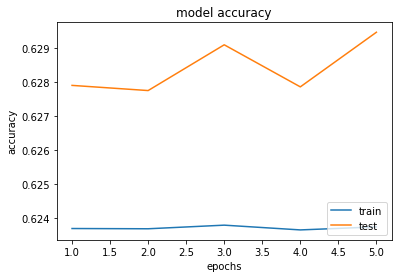

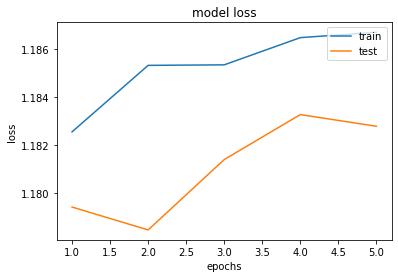

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.argmax(axis=-1) # 예 측 을 정 수 시 퀀 스 로 변 환

3604/3604 [==============================] - 7s 2ms/step


In [ ]:
print(' 정 확 도 (Accuracy) : ', sum(y_predicted == y_test) / len(y_test))

 정 확 도 (Accuracy) :  0.6213595601117067


기준모델(최빈값) : 0.2

1차로 그냥 실행시킨 상태로는 0.62의 정확도를 보인다.

분명 기준모델보다는 향상되었지만 일반적인 상황에서 0.95 정도의 정확도는 되어야 유의미한 성능이라고 생각한다.

데이터 정제를 좀 더 해야하는건가? 모델의 문제인가? 고민을 해봐야겠다.

In [ ]:
model.save_pretrained('/gdrive/MyDrive/2023beaver/NLPpractice1/paki_bert_base_uncased.h5')